In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Creating dumming using one hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas_ml import ConfusionMatrix

In [2]:
data = pd.read_csv('data/names_dataset.csv')
data.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


Features
- Last Letter

In [3]:
def feature_last(name):
    return name[-1]

In [4]:
data['Last'] = data['name'].apply(feature_last)
data.head()

,index,name,sex,Last
0,0,Mary,F,y
1,1,Anna,F,a
2,2,Emma,F,a
3,3,Elizabeth,F,h
4,4,Minnie,F,e


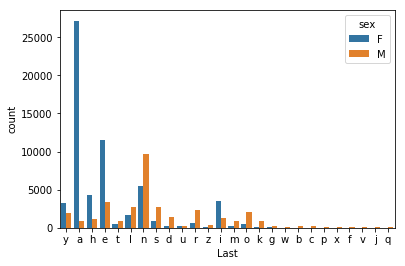

In [5]:
sns.countplot(x='Last',data =data,hue="sex")

Feature
- N-grams
    - bi-grams
    - tri-grams

In [6]:
import nltk # natural language tool kit
from nltk import ngrams

In [7]:
def bigram(name):
    bi = list(ngrams(name,2))
    return ["".join(gram) for gram in bi]

def trigram(name):
    tri = list(ngrams(name,3))
    return ["".join(gram) for gram in tri]


In [8]:
female = data[data['sex'] == 'F'].iloc[:1000]
male = data[data['sex'] == 'M'].iloc[:1000]

df = pd.concat((female,male),axis=0,ignore_index=True)

In [9]:
df['sex'].value_counts()

M    1000
F    1000
Name: sex, dtype: int64

In [10]:
def feature(name):
    gram = bigram(name) + trigram(name)+[feature_last(name)]
    return gram

In [11]:
# Extracting all features
fset = []
for name in df['name']:
    name = name.lower()
    f = feature(name)
    fset.extend(f)

In [12]:
fset = set(fset)

In [26]:
from collections import defaultdict

In [37]:
frame = defaultdict(lambda: defaultdict(lambda:0))

In [42]:
# Extracting all features
for name in df['name']:
    name = name.lower()
    for key in fset:
        frame[name][key] = 0.0

In [43]:
for name in df['name']:
    name = name.lower()
    f = feature(name)
    for fkey in f:
        frame[name][fkey] +=1.0

In [44]:
dframe = pd.DataFrame(frame).T

In [45]:
dframe.head()

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi
mary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anna,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
emma,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
elizabeth,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minnie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X = dframe.loc[:,:].values
y = df['sex'].values

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
model = MultinomialNB()

In [51]:
model.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
# Extracting all features
test = defaultdict(lambda: defaultdict(lambda:0))
name = 'tarun'
name = name.lower()
for key in fset:
    test[name][key] = 0.0
    
f = feature(name)
for fkey in f:
    if fkey in fset:
        test[name][fkey] +=1.0
        
test_array= pd.DataFrame(test).T.values

In [83]:
model.predict(test_array)

array(['M'], 
      dtype='<U1')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# test my model

In [ ]:
def predict_gender(name):
    f = feature_last(name)
    # convert feature into factor (labelencoder)

    labelen = le.transform([f])

    # one hot encoder
    test = ohe.transform(labelen.reshape(-1,1)).toarray()
    test
    # pass test to my model
    out = model.predict(test)

    if out == 0:
        return 'Male'
    else:
        return 'Female'

In [ ]:
predict_gender('srikanth')

In [ ]:
y_pred = model.predict(x)

In [ ]:
cm = ConfusionMatrix(y,y_pred)
print(cm)
print(cm.classification_report)

In [ ]:
cm.plot()